In [1]:
import pandas as pd
import seaborn as sn
import re,random,warnings,nltk
import numpy as np
from nltk.corpus import stopwords  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text 
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("D:\\chrome downloads\\archive\\movie.csv")

df_1.dropna(subset=['text'], inplace=True)
df_1.info()

df_2 = pd.read_csv("C:\\Users\\LENOVO\\jupyternote\\Deep Learning\\tweet_pos_neg.csv")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       40000 non-null  object
 1   sentiment  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28781 entries, 0 to 28780
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       28768 non-null  object 
 1   sentiment  28781 non-null  float64
dtypes: float64(1), object(1)
memory usage: 449.8+ KB


In [3]:
df = pd.concat([df_1,df_2], ignore_index=True)

df.dropna(subset=['text'], inplace=True)
df.dropna(subset=['sentiment'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68768 entries, 0 to 68780
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       68768 non-null  object 
 1   sentiment  68768 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


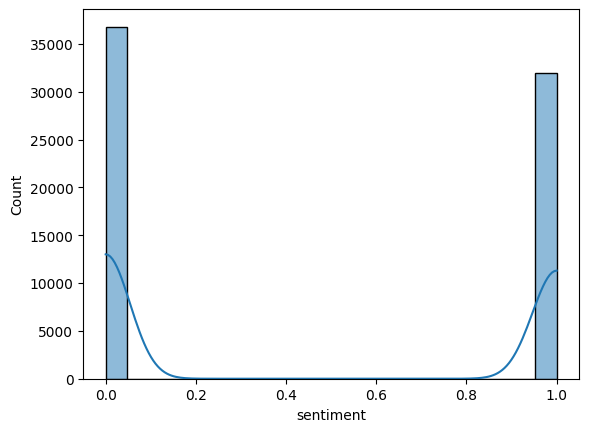

In [4]:
def plot():
    sn.histplot(df['sentiment'], kde=True)
plot()

### Test Preprocessing

In [5]:
def func_1(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    cleaned_string = re.sub(r'[-_.,;:\'"#<>\/=&@*$!)(}{?\d]', '', text)
    cleaned_string = re.sub('https://.*','',cleaned_string) 
    cleaned_string = re.sub(pattern='@[a-zA-Z_0-9]*', repl='@user',string=cleaned_string)
    cleaned_string = cleaned_string.lower()
    
    return cleaned_string

In [6]:
df['text'] = df['text'].apply(lambda i :func_1(i))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68768 entries, 0 to 68780
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       68768 non-null  object 
 1   sentiment  68768 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


### Creating Count Vectors

In [7]:
warnings.filterwarnings("ignore")

count_vect_1 = CountVectorizer()
feature_vector = count_vect_1.fit(df.text)

features = feature_vector.get_feature_names_out()
print('Total no of features',len(features))


Total no of features 174509


In [8]:
lemmatizer = WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()
stop_words = text.ENGLISH_STOP_WORDS

def lematized_words(doc):
    lematized_words = [lemmatizer.lemmatize(i) for i in analyzer(doc)]
    
    non_stop_words = [word for word in lematized_words if word not in stop_words]
    
    return non_stop_words

In [9]:
count_vect = CountVectorizer(analyzer=lematized_words,max_features=30000)
feature_vector = count_vect.fit(df.text)

features = feature_vector.get_feature_names_out()
print('Total no of features',len(features))

train_features = count_vect.transform(df.text)
print('Shape:',train_features.shape,'Type:',type(train_features))

Total no of features 30000
Shape: (68768, 30000) Type: <class 'scipy.sparse._csr.csr_matrix'>


In [10]:
non_zeros = train_features.getnnz()
print('Non zero values in the matrix',non_zeros)
print('Density of the matrix:',non_zeros*100 / (train_features.shape[0] * train_features.shape[1]))

Non zero values in the matrix 3500244
Density of the matrix: 0.1696643787808283


### Spliting The Dataset

In [11]:
X_train,X_test,y_train,y_test = train_test_split(train_features,df.sentiment,test_size=0.3,random_state=42)

### Naive-Bayes Model

In [12]:
NB_model = BernoulliNB()
NB_model.fit(X_train,y_train)

BernoulliNB()

In [13]:
NB_predictions = NB_model.predict(X_test)
accuracy = accuracy_score(y_test,NB_predictions)
print('Accuracy:', accuracy)
print(metrics.classification_report(y_test,NB_predictions))

Accuracy: 0.7171247152343561
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77     11053
         1.0       0.79      0.53      0.64      9578

    accuracy                           0.72     20631
   macro avg       0.74      0.70      0.70     20631
weighted avg       0.73      0.72      0.71     20631



<Axes: >

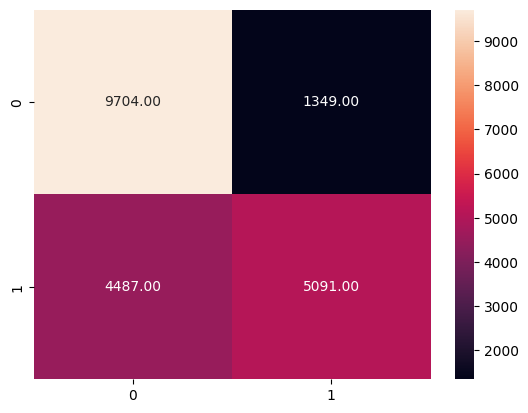

In [14]:
cm=metrics.confusion_matrix(y_test,NB_predictions)
sn.heatmap(cm,annot=True,fmt='.2f')

### Logistic Regression Model

In [15]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
logistic_predictions = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.822063884445737
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84     11053
         1.0       0.83      0.78      0.80      9578

    accuracy                           0.82     20631
   macro avg       0.82      0.82      0.82     20631
weighted avg       0.82      0.82      0.82     20631



<Axes: >

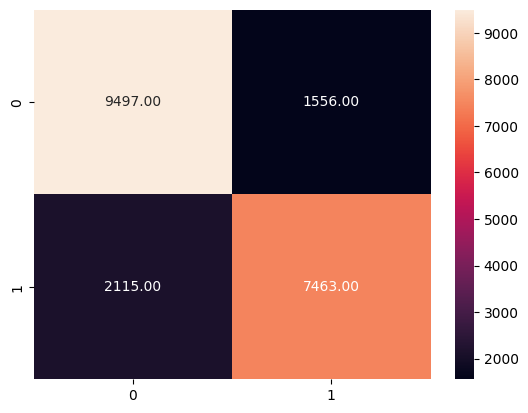

In [17]:
cm = metrics.confusion_matrix(y_test,logistic_predictions)
sn.heatmap(cm,annot=True,fmt='.2f')

### RandomForest Model

In [18]:
random_forest_model = RandomForestClassifier(n_estimators=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [19]:
rf_predictions = random_forest_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.7578401434734138
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78     11053
         1.0       0.76      0.70      0.73      9578

    accuracy                           0.76     20631
   macro avg       0.76      0.75      0.75     20631
weighted avg       0.76      0.76      0.76     20631



<Axes: >

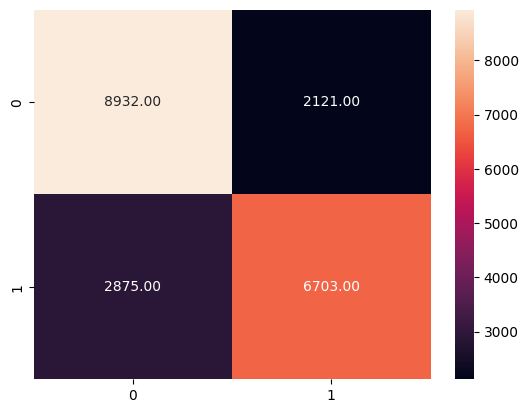

In [20]:
cm = metrics.confusion_matrix(y_test,rf_predictions)
sn.heatmap(cm,annot=True,fmt='.2f')

### DecisionTree Model

In [21]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
decision_tree_predictions = decision_tree_model.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print(f'Decision Tree Accuracy: {decision_tree_accuracy}')
print(classification_report(y_test, decision_tree_predictions))

Decision Tree Accuracy: 0.7053947942416752
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     11053
         1.0       0.68      0.70      0.69      9578

    accuracy                           0.71     20631
   macro avg       0.70      0.70      0.70     20631
weighted avg       0.71      0.71      0.71     20631



<Axes: >

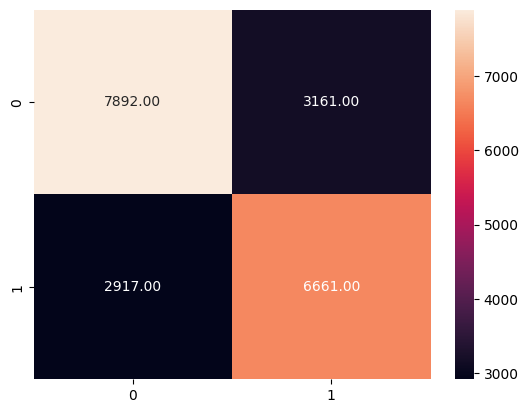

In [23]:
cm = metrics.confusion_matrix(y_test,decision_tree_predictions)
sn.heatmap(cm,annot=True,fmt='.2f')

### Naive-Bayes Model Using TF-IDF Vectorizer

In [24]:
tfidf_vectorizer = TfidfVectorizer(analyzer=lematized_words,max_features=15000)
feature_vector = tfidf_vectorizer.fit(df.text)
features = feature_vector.get_feature_names_out()

train_feature_tfi = tfidf_vectorizer.transform(df.text)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_feature_tfi,df.sentiment, test_size=0.2, random_state=42)

In [26]:
model_tfi = GaussianNB()
model_tfi.fit(X_train.toarray(),y_train)

GaussianNB()

In [27]:
predicted_values = model_tfi.predict(X_test.toarray())
accuracy = accuracy_score(y_test,predicted_values)
print('Accuracy:', accuracy)
print(metrics.classification_report(y_test,predicted_values))

Accuracy: 0.6970335902282973
              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74      7335
         1.0       0.72      0.58      0.64      6419

    accuracy                           0.70     13754
   macro avg       0.70      0.69      0.69     13754
weighted avg       0.70      0.70      0.69     13754



<Axes: >

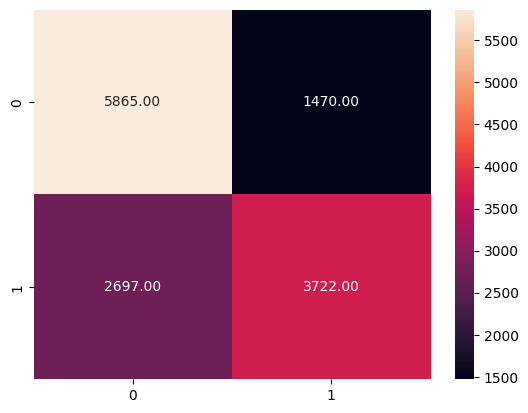

In [28]:
cm = metrics.confusion_matrix(y_test,predicted_values)
sn.heatmap(cm,annot=True,fmt='.2f')

### Model Predictions

In [29]:
def predict_sentiment(text, vectorizer, model):
    cleaned_text = func_1(text)
    
    transformed_text = vectorizer.transform([cleaned_text])

    prediction = model.predict(transformed_text)

    return 'Positive' if prediction[0] == 1 else 'Negative'

In [31]:
text_to_predict = '''I was really disappointed with this movie. The plot was confusing and poorly executed,
and the characters felt one-dimensional. The dialogue was lackluster, and I found it hard
to connect with any of the characters. The pacing was off, and there were too many unnecessary
scenes that didn't contribute to the overall story.I had high expectations, but sadly, this movie
didn't liv them'''
predicted_sentiment = predict_sentiment(text_to_predict, count_vect, logistic_model)

print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: Negative


In [32]:
text_to_predict = '''very good movie #love this movie'''
predicted_sentiment = predict_sentiment(text_to_predict, count_vect, logistic_model)

print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: Positive


### Save Model and CountVectorizer

In [ ]:
import pickle

with open('logistic_model_sentiment_30.pkl', 'wb') as model_file:
    pickle.dump(logistic_model, model_file)

with open('count_vectorizer_ML_sentiment_30.pkl', 'wb') as vectorizer_file:
    pickle.dump(count_vect_1, vectorizer_file)